# Mini Project 2: Data Exploration and Engineering 
### by Ahmad & Hanni.
  
The objective of this assignment is to enable you to build and train skills in business data exploration and
analysis by applying methods from statistics.

In [194]:
# libraries we need to import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, preprocessing, metrics

In [196]:
# The data urls that contain the data
data_red = 'https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/UCL-Wine/winequality-red.csv'
data_white = 'https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/UCL-Wine/winequality-white.csv'

# Load the data
df_red = pd.read_csv(data_red, sep=";")
df_white = pd.read_csv(data_white, sep=";")

In [198]:
# Check if there's any missing data
df_red.isnull().sum()
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [200]:
# There's not missing data. Let's check if there's any that are not NA
df_red.isna().sum()
df_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [202]:
# Aggregate the two files in one still keeping the identity of each wine type - “red” or “white”.
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'

combined_wine_df = pd.concat([df_red, df_white])

#### Explore the data

In [205]:
# Explore the features of the original and the new files:
#  a. number of rows and columns

print('Rows and columns:')
print('Red original shape: ', df_red.shape)
print('White original shape: ', df_white.shape)
print('Combined original shape: ', combined_wine_df.shape)
print('\n')

#  b. type of data in each column
print('Type of each column:')
print('Red type: ', df_red.dtypes)
print('White type: ', df_white.dtypes)
print('combined type: ', combined_wine_df.dtypes)
print('\n')

Rows and columns:
Red original shape:  (1599, 13)
White original shape:  (4898, 13)
Combined original shape:  (6497, 13)


Type of each column:
Red type:  fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object
White type:  fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type         

In [207]:
# Calculate the descriptive statistics of the numeric data.
combined_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

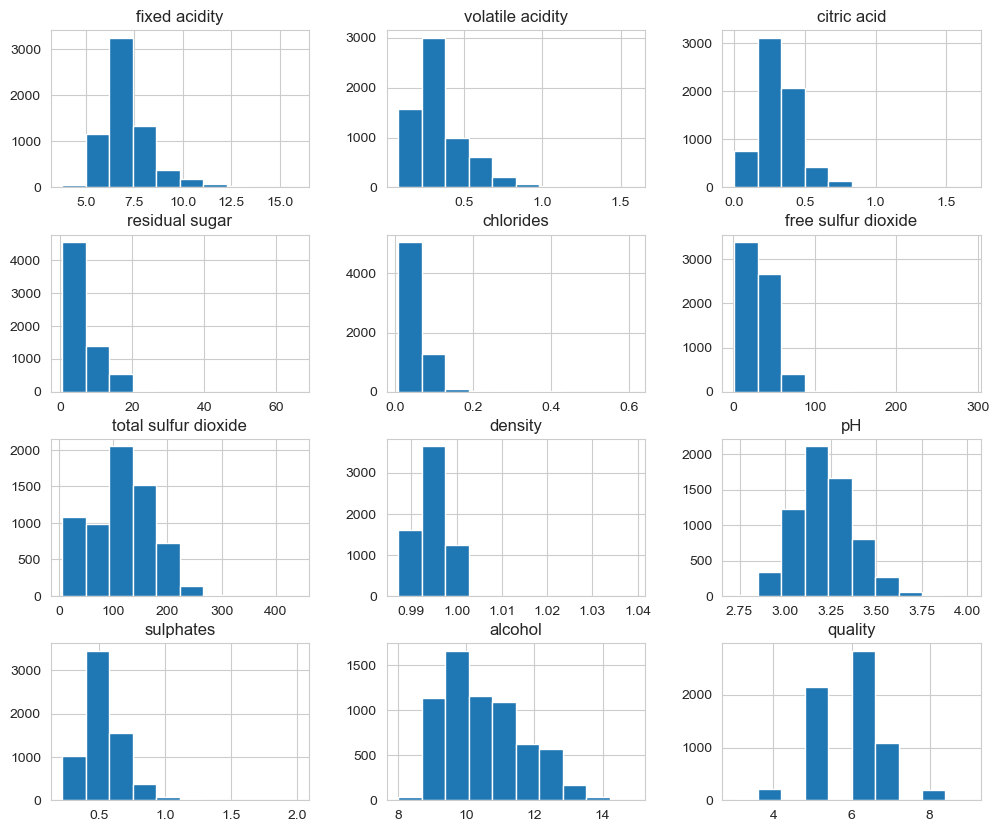

In [249]:
# Check if the values of the attributes are normally distributed.
combined_wine_df.hist(figsize=(12, 10))
# Most values of the attributes are normally distributed. There is four that isn't normally distributed: residual sugar, chlorides,
# free sulfur dioxide, quality. We will investigate those four further underneath.

Text(0.5, 1.0, 'Wine Quality Comparison')

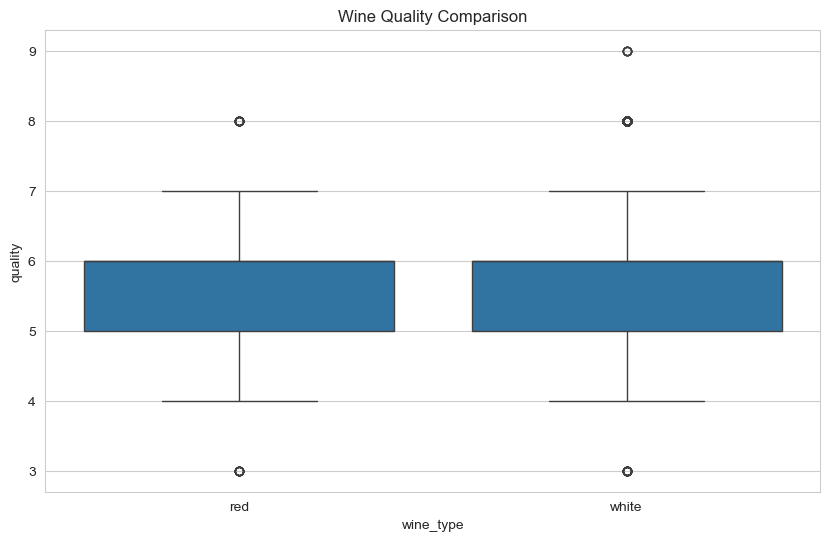

In [210]:
# Plot diagrams that visualize the differences in red and white wine samples. Use as many diagrams as appropriate.
# Use the diagrams as a support for answering the following questions:
sns.set_style("whitegrid")
# a. what do diagrams show exactly?
# b. which type of wine has higher average quality, how big is the difference?
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_type', y='quality', data=combined_wine_df)
plt.title('Wine Quality Comparison')

The Average Quality differnce between Red and White Wine: 0.2418868366841158


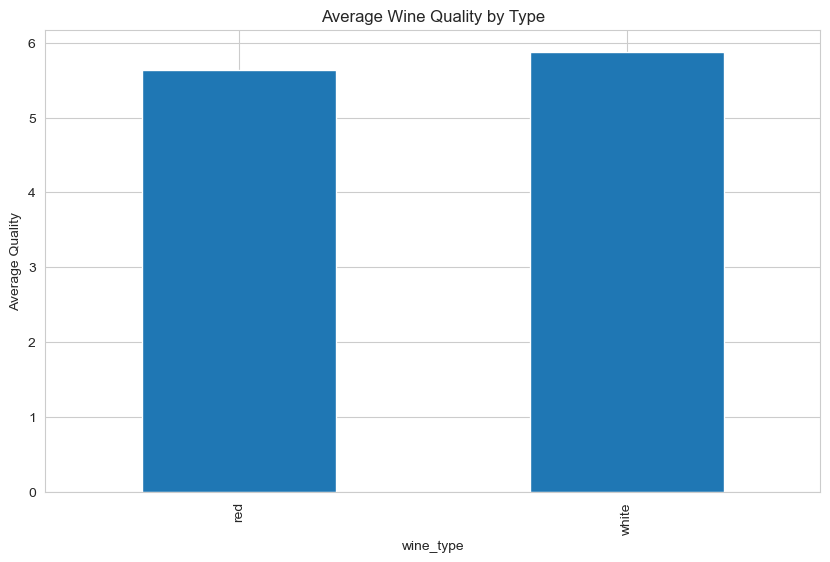

In [213]:
# b. Higher average quality type and the difference.
plt.figure(figsize=(10, 6))
combined_wine_df.groupby('wine_type')['quality'].mean().plot(kind='bar')
plt.title('Average Wine Quality by Type')
plt.ylabel('Average Quality')

avg_quality = combined_wine_df.groupby('wine_type')['quality'].mean()
quality_difference = abs(avg_quality['red'] - avg_quality['white'])
print(f'The Average Quality differnce between Red and White Wine: {quality_difference}')

The average level of alcohol in Red Wine: 10.422983114446529 
The average level of alcohol in White Wine: 10.5142670477746


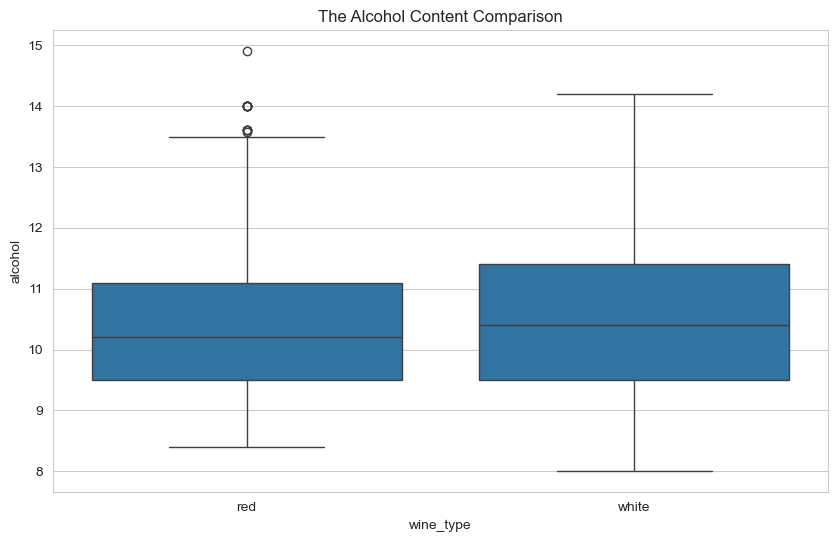

In [215]:
# c. which type of wine has higher average level of alcohol?
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_type', y='alcohol', data=combined_wine_df)
plt.title('The Alcohol Content Comparison')

avg_alcohol = combined_wine_df.groupby('wine_type')['alcohol'].mean()
print(f'The average level of alcohol in Red Wine: {avg_alcohol['red']} \nThe average level of alcohol in White Wine: {avg_alcohol['white']}')

Average Quantity of residual sugar for Red Wine: 2.53880550343965 
Average Quantity of residual sugar for White Wine: 6.391414863209474


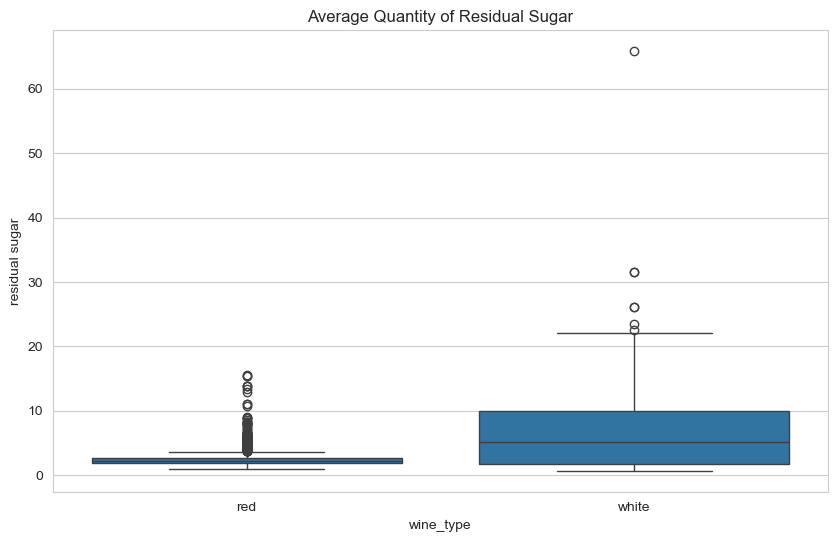

In [217]:
# d. which one has higher average quantity of residual sugar?
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_type', y='residual sugar', data=combined_wine_df)
plt.title('Average Quantity of Residual Sugar')

avg_residual_sugar = combined_wine_df.groupby('wine_type')['residual sugar'].mean()
print(f'Average Quantity of residual sugar for Red Wine: {avg_residual_sugar['red']} \nAverage Quantity of residual sugar for White Wine: {avg_residual_sugar['white']}')

Text(0.5, 1.0, 'Alcohol Content vs Quality')

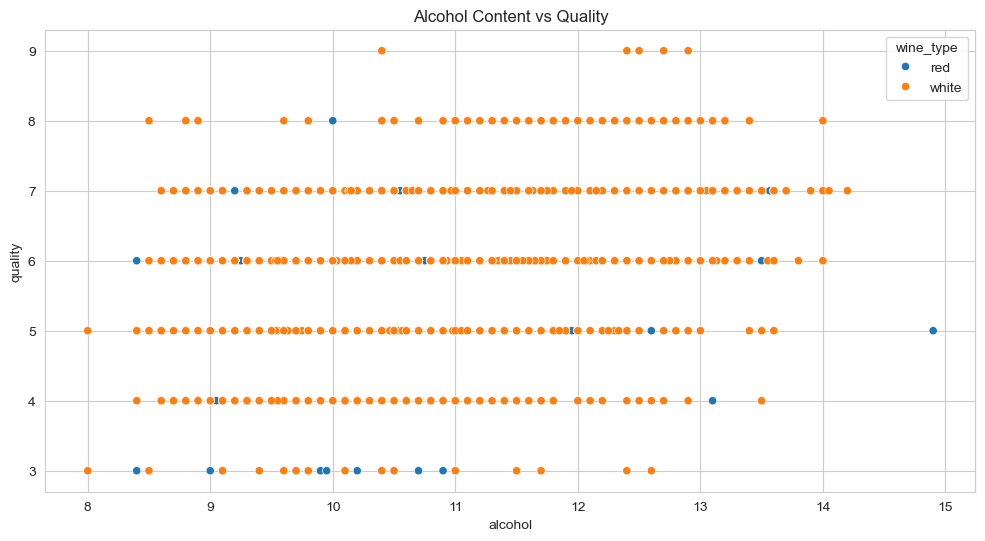

In [218]:
# e. do the quantity of alcohol and residual sugar influence the quality of the wine?
plt.figure(figsize=(12, 6))
sns.scatterplot(x='alcohol', y='quality', hue='wine_type', data=combined_wine_df)
plt.title('Alcohol Content vs Quality')

Text(0.5, 1.0, 'Residual Sugar vs Quality')

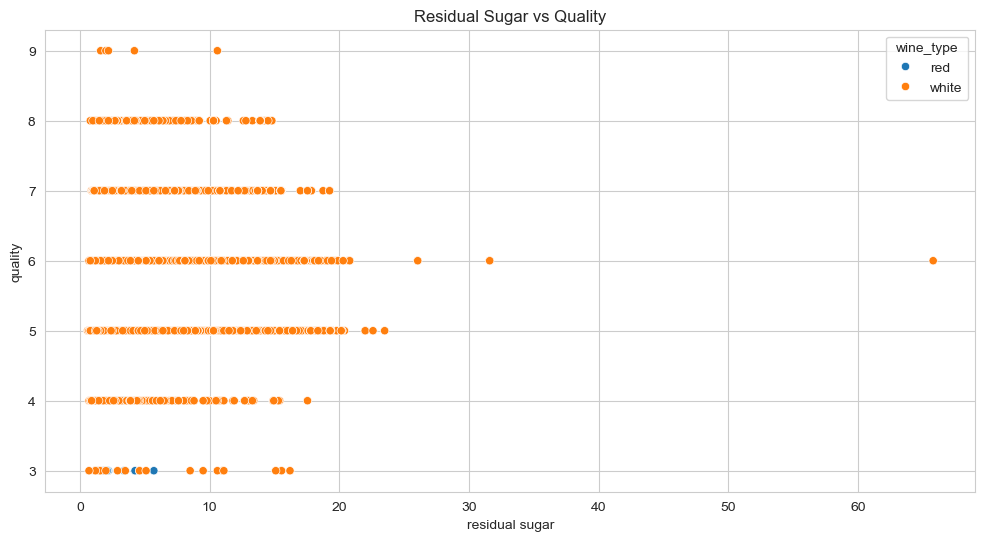

In [219]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='residual sugar', y='quality', hue='wine_type', data=combined_wine_df)
plt.title('Residual Sugar vs Quality')

In [239]:
red_corr = combined_wine_df[combined_wine_df['wine_type'] == 'red'][['quality', 'alcohol', 'residual sugar']].corr()
white_corr = combined_wine_df[combined_wine_df['wine_type'] == 'white'][['quality', 'alcohol', 'residual sugar']].corr()
print('Correlations for Red Wine')
print(red_corr['quality'][['alcohol', 'residual sugar']])
print('Correlations for White Wine')
print(white_corr['quality'][['alcohol', 'residual sugar']])

Correlations for Red Wine
alcohol           0.476166
residual sugar    0.013732
Name: quality, dtype: float64
Correlations for White Wine
alcohol           0.435575
residual sugar   -0.097577
Name: quality, dtype: float64


Text(0.5, 1.0, 'Fixed Acidity vs Quality')

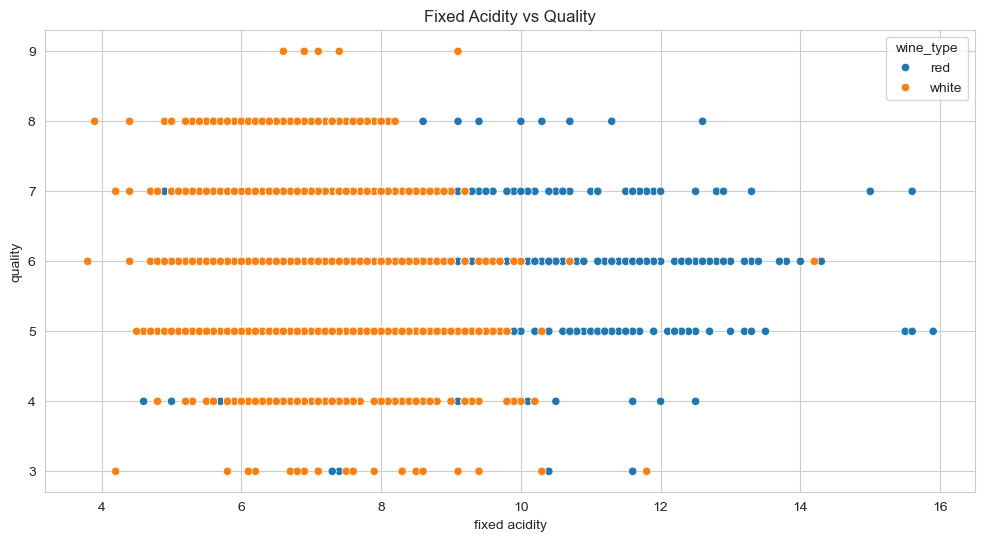

In [251]:
# 7. Which other questions might be of interest for the wine consumers and which of wine distributers?
# How does the acidity level correlate with wine quality for each type of wine?
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fixed acidity', y='quality', hue='wine_type', data=combined_wine_df)
plt.title('Fixed Acidity vs Quality')

The Subset with the highest density: (2.978, 3.236]


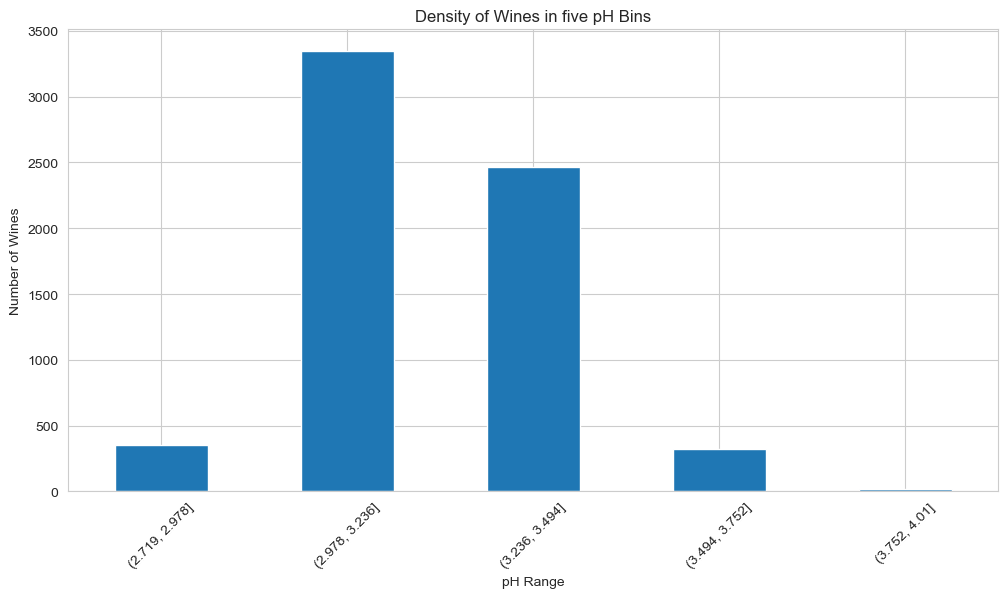

In [285]:
# 8. Split the aggregated data into five subsets by binning the attribute pH. Which subset has highest density? 
combined_wine_df['ph_bin'] = pd.cut(combined_wine_df['pH'], bins=5)
density = combined_wine_df['ph_bin'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
density.plot(kind='bar')
plt.title('Density of Wines in five pH Bins')
plt.xlabel('pH Range')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

highest_density_bin = density.idxmax()
print(f'The Subset with the highest density: {highest_density_bin}')

The Subset with the highest density: (3.107, 3.236]


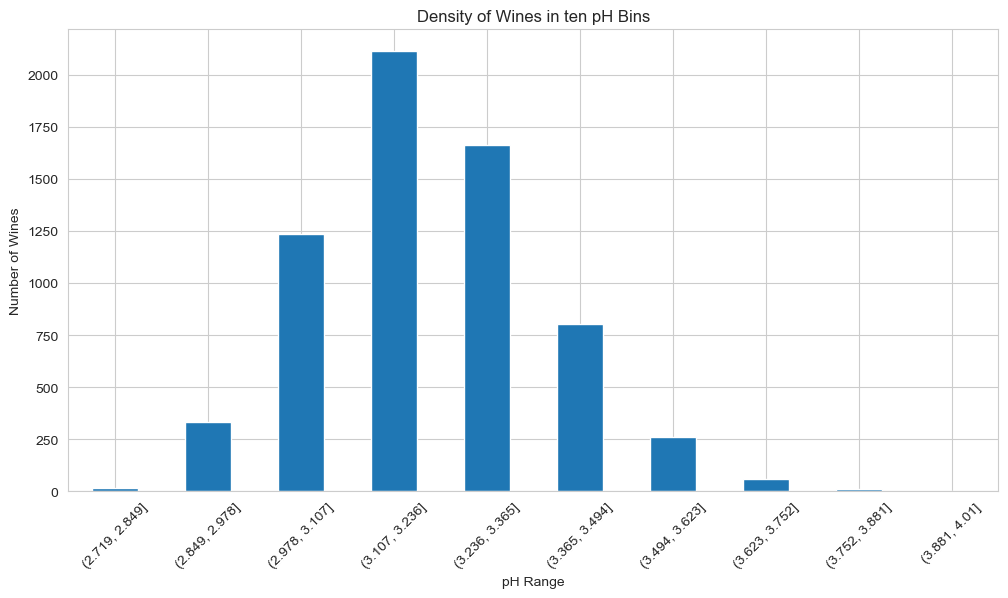

In [289]:
# What if you split the data in ten subsets?
combined_wine_df['ph_bin'] = pd.cut(combined_wine_df['pH'], bins=10)
density = combined_wine_df['ph_bin'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
density.plot(kind='bar')
plt.title('Density of Wines in ten pH Bins')
plt.xlabel('pH Range')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

highest_density_bin = density.idxmax()
print(f'The Subset with the highest density: {highest_density_bin}')

Attribute with highest correlation to quality: alcohol (0.444)
Attribute with lowest correlation to quality: pH (0.020)


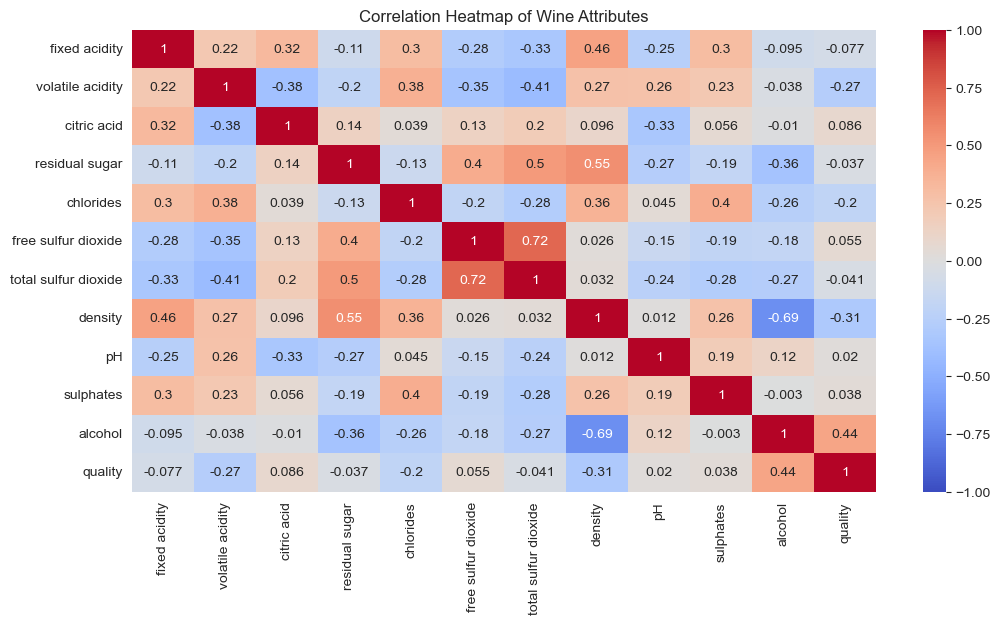

In [307]:
# 9. Create a heat map or a correlation matrix of all data and investigate it. Can you tell which wine
#    attribute has the biggest influence on the wine quality? Which has the lowest? Are there any
#    attributes, apart from the wine quality, which are highly correlated?
numeric_df = combined_wine_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Wine Attributes')

quality_correlations = corr_matrix['quality'].drop('quality')
highest_corr = quality_correlations.abs().idxmax()
lowest_corr = quality_correlations.abs().idxmin()

print(f'Attribute with highest correlation to quality: {highest_corr} ({quality_correlations[highest_corr]:.3f})')
print(f'Attribute with lowest correlation to quality: {lowest_corr} ({quality_correlations[lowest_corr]:.3f})')

In [309]:
# 9

In [ ]:
# 10. Do you get the same correlation results when you analyze the red and the white wine data sets separately?
